# Dynamic programming I: sequential discrete choice
ECON 3127/4414/8014 Computational methods in economics  
Week 8  
Fedor Iskhakov  
<img src="../img/lecture.png" width="64px"/>

&#128214; Adda and Russell Cooper "Dynamic Economics. Quantitative Methods and Applications."
    *Chapters: 2, 3.3*

## Plan for the lecture
1. Shortest path problems
2. Contraction mappings and fixed point theory
3. Discrete choice labor search

## What is Dynamic Programming
**"DP is recursive method for solving sequential decision problems"**  
&#128214; Rust 2006, _New Palgrave Dictionary of Economics_

In computer science the meaning of the term is broader:   
**DP is a general algorithm design technique for solving problems with overlapping sub-problems.**

### Bellman's Principle of Optimality
"An optimal policy has a property that whatever the initial state and initial decision are, the remaining decisions must constitute an optimal policy with regard to the state resulting from the first decision."  
&#128214; Bellman, 1957 "Dynamic Programming"

- So, the sequential decision problem is broken into _initial decision_ problem and the _future decisions_ problem

- The solution can be computed through **backward induction**, i.e. solving a sequential decision problem from the later periods

- Embodiment of the recursive way of modeling sequential decisions is **Bellman equation**

- DP is powerful due to its flexibility and breadth: it provides a framework to study decision making over time, under uncertainty, and can accommodate learning, strategic interactions between agents (game theory) and market interactions (equilibrium theory).

### Origin of the term Dynamic Programming
&#128214; Bellman's autobiography "The Eye of the Hurricane"
- The 1950’s were not good years for mathematical research. We had a very interesting gentleman in Washington named Wilson. He was Secretary of Defence, and he actually had a pathological fear and hatred of the word "research".
- I’m not using the term lightly; I’m using it precisely. His face would suffuse, he would turn red, and he would get violent if people used the term, research, in his presence. You can imagine how he felt, then, about the term, mathematical.
- Hence, I felt I had to do something to shield Wilson and the Air Force from the fact that I was really doing mathematics inside the RAND Corporation. What title, what name, could I choose?
- In the first place, I was interested in planning, in decision-making, in thinking. But planning, is not a good word for various reasons. I decided therefore to use the word, "programming".
- I wanted to get across the idea that this was dynamic, this was multistage, this was time-varying.
- I thought, let’s kill two birds with one stone. Let’s take a word which has an absolutely precise meaning, namely dynamic, in the classical physical sense. It also has a very interesting property as an adjective, and that is it’s impossible to use the word, dynamic, in the pejorative sense.
- Thus, I thought dynamic programming was a good name. It was something not even a Congressman could object to. So I used it as an umbrella for my activities.

## Dynamic programming in economics

Many important problems and economic models are analyzed and solved using dynamic programming:
- Dynamic models of labor supply
- Job search
- Human capital accumulation
- Health process, insurance and long term care
- Consumption/savings choices
- Durable consumption
- Growth models
- Heterogeneous agents models
- Overlapping generation models

## Shortest path problems

Classic problem with applications in
- economics
- operation research and transportation
- robotics
- telecommunication
---
- Directed graph to represent the network
- Each edge has a _cost_
- Find a path from given start to finish with minimum cost

### Shortest path on a DAG

DAG = directed acyclic graph $\{V,E\}$ consists of _vertexes_ $v_i \in V$  and _edges_ $\{v_i,v_j\} \in E$ such that there is no 

$$
\{v_1,v_2\},\{v_2,v_3\},\dots,\{v_k,v_1\} \in E.
$$

![graph1](img/graph/graph.png)

### What is the cheapest way to get form A to G?
<img src="img/graph/graph.png" width="600px"/>

### Solution
![graph1](img/graph/graph3.png)
![graph1](img/graph/graph4.png)

### Solution by backward induction: Dijkstra algorithm

1. Mark all nodes unvisited
2. Assign to every node a tentative distance value: zero for initial node, else plus infinity
3. For the current node, consider all of its unvisited neighbors and calculate their tentative distances through the current node using _minimum_ formula
4. When we are done considering all of the unvisited neighbors of the current node, mark the current node as visited
5. If the destination node has been marked visited, we are done
6. Otherwise, select the unvisited node that is _marked with the smallest tentative distance_, goto 3 with this node as current node

### Recursive formulation of the problem
We have directed graph $\{V,E\}$ and cost function $c: E  \rightarrow \mathbb{R}$.

Let $J(v)$ be the shortes path from vertex v. Then for all neighbors of $v$ denoted $v'$, i.e. $\{v,v'\}\in E$, we have

$$
J(v) = \min_{v': \{v,v'\}\in E} \big( c(v,v') + J(v') \big)
$$

This is Bellman equation for teh problem. 

### Solving for $J(v)$ (using Bellman–Ford algorithm)

1. Set $n=0$, $J_0(v)=0$
2. Increment $n$, compute $J_n(v)=\min_{v': \{v,v'\}\in E} \big( c(v,v') + J(v') \big)$ for all $v$
3. If $J_n$ is identical to $J_{n-1}$ terminate, otherwise go back to 2.
---
Will this algorithm terminate?

In [143]:
%%file graph.txt
node0, node2 5, node3 3, node1 1
node1, node3 9, node4 6
node2, node5 2
node3, node6 8
node4, node6 4
node5, node6 1
node6,

Overwriting graph.txt


In [144]:
%%file graph.txt
node0, node1 2, node2 5
node1, node0 2, node2 1, node3 4
node2, node0 5, node1 1, node3 2
node3, node1 4, node2 2

Overwriting graph.txt


In [145]:
%%file graph.txt
node0, node1 0.04, node8 11.11, node14 72.21
node1, node46 1247.25, node6 20.59, node13 64.94
node2, node66 54.18, node31 166.80, node45 1561.45
node3, node20 133.65, node6 2.06, node11 42.43
node4, node75 3706.67, node5 0.73, node7 1.02
node5, node45 1382.97, node7 3.33, node11 34.54
node6, node31 63.17, node9 0.72, node10 13.10
node7, node50 478.14, node9 3.15, node10 5.85
node8, node69 577.91, node11 7.45, node12 3.18
node9, node70 2454.28, node13 4.42, node20 16.53
node10, node89 5352.79, node12 1.87, node16 25.16
node11, node94 4961.32, node18 37.55, node20 65.08
node12, node84 3914.62, node24 34.32, node28 170.04
node13, node60 2135.95, node38 236.33, node40 475.33
node14, node67 1878.96, node16 2.70, node24 38.65
node15, node91 3597.11, node17 1.01, node18 2.57
node16, node36 392.92, node19 3.49, node38 278.71
node17, node76 783.29, node22 24.78, node23 26.45
node18, node91 3363.17, node23 16.23, node28 55.84
node19, node26 20.09, node20 0.24, node28 70.54
node20, node98 3523.33, node24 9.81, node33 145.80
node21, node56 626.04, node28 36.65, node31 27.06
node22, node72 1447.22, node39 136.32, node40 124.22
node23, node52 336.73, node26 2.66, node33 22.37
node24, node66 875.19, node26 1.80, node28 14.25
node25, node70 1343.63, node32 36.58, node35 45.55
node26, node47 135.78, node27 0.01, node42 122.00
node27, node65 480.55, node35 48.10, node43 246.24
node28, node82 2538.18, node34 21.79, node36 15.52
node29, node64 635.52, node32 4.22, node33 12.61
node30, node98 2616.03, node33 5.61, node35 13.95
node31, node98 3350.98, node36 20.44, node44 125.88
node32, node97 2613.92, node34 3.33, node35 1.46
node33, node81 1854.73, node41 3.23, node47 111.54
node34, node73 1075.38, node42 51.52, node48 129.45
node35, node52 17.57, node41 2.09, node50 78.81
node36, node71 1171.60, node54 101.08, node57 260.46
node37, node75 269.97, node38 0.36, node46 80.49
node38, node93 2767.85, node40 1.79, node42 8.78
node39, node50 39.88, node40 0.95, node41 1.34
node40, node75 548.68, node47 28.57, node54 53.46
node41, node53 18.23, node46 0.28, node54 162.24
node42, node59 141.86, node47 10.08, node72 437.49
node43, node98 2984.83, node54 95.06, node60 116.23
node44, node91 807.39, node46 1.56, node47 2.14
node45, node58 79.93, node47 3.68, node49 15.51
node46, node52 22.68, node57 27.50, node67 65.48
node47, node50 2.82, node56 49.31, node61 172.64
node48, node99 2564.12, node59 34.52, node60 66.44
node49, node78 53.79, node50 0.51, node56 10.89
node50, node85 251.76, node53 1.38, node55 20.10
node51, node98 2110.67, node59 23.67, node60 73.79
node52, node94 1471.80, node64 102.41, node66 123.03
node53, node72 22.85, node56 4.33, node67 88.35
node54, node88 967.59, node59 24.30, node73 238.61
node55, node84 86.09, node57 2.13, node64 60.80
node56, node76 197.03, node57 0.02, node61 11.06
node57, node86 701.09, node58 0.46, node60 7.01
node58, node83 556.70, node64 29.85, node65 34.32
node59, node90 820.66, node60 0.72, node71 0.67
node60, node76 48.03, node65 4.76, node67 1.63
node61, node98 1057.59, node63 0.95, node64 4.88
node62, node91 132.23, node64 2.94, node76 38.43
node63, node66 4.43, node72 70.08, node75 56.34
node64, node80 47.73, node65 0.30, node76 11.98
node65, node94 594.93, node66 0.64, node73 33.23
node66, node98 395.63, node68 2.66, node73 37.53
node67, node82 153.53, node68 0.09, node70 0.98
node68, node94 232.10, node70 3.35, node71 1.66
node69, node99 247.80, node70 0.06, node73 8.99
node70, node76 27.18, node72 1.50, node73 8.37
node71, node89 104.50, node74 8.86, node91 284.64
node72, node76 15.32, node84 102.77, node92 133.06
node73, node83 52.22, node76 1.40, node90 243.00
node74, node81 1.07, node76 0.52, node78 8.08
node75, node92 68.53, node76 0.81, node77 1.19
node76, node85 13.18, node77 0.45, node78 2.36
node77, node80 8.94, node78 0.98, node86 64.32
node78, node98 355.90, node81 2.59
node79, node81 0.09, node85 1.45, node91 22.35
node80, node92 121.87, node88 28.78, node98 264.34
node81, node94 99.78, node89 39.52, node92 99.89
node82, node91 47.44, node88 28.05, node93 11.99
node83, node94 114.95, node86 8.75, node88 5.78
node84, node89 19.14, node94 30.41, node98 121.05
node85, node97 94.51, node87 2.66, node89 4.90
node86, node97 85.09
node87, node88 0.21, node91 11.14, node92 21.23
node88, node93 1.31, node91 6.83, node98 6.12
node89, node97 36.97, node99 82.12
node90, node96 23.53, node94 10.47, node99 50.99
node91, node97 22.17
node92, node96 10.83, node97 11.24, node99 34.68
node93, node94 0.19, node97 6.71, node99 32.77
node94, node98 5.91, node96 2.03
node95, node98 6.17, node99 0.27
node96, node98 3.32, node97 0.43, node99 5.87
node97, node98 0.30
node98, node99 0.33
node99,

Overwriting graph.txt


In [146]:
# QE code based on dictionary
def read_graph(in_file):
    """ Read in the graph from the data file.  The graph is stored
    as a dictionary, where the keys are the nodes, and the values
    are a list of pairs (d, c), where d is a node and c is a number.
    If (d, c) is in the list for node n, then d can be reached from
    n at cost c.
    """
    graph = {}
    infile = open(in_file)
    for line in infile:
        elements = line.split(',')
        node = elements.pop(0)
        graph[node] = []
        if node != 'node99':
            for element in elements:
                destination, cost = element.split()
                graph[node].append((destination, float(cost)))
    infile.close()
    return graph

def update_J(J, graph):
    "The Bellman operator."
    next_J = {}
    for node in graph:
        if node == 'node99':
            next_J[node] = 0
        else:
            next_J[node] = min(cost + J[dest] for dest, cost in graph[node])
    return next_J

def print_best_path(J, graph):
    """ Given a cost-to-go function, computes the best path.  At each node n,
    the function prints the current location, looks at all nodes that can be
    reached from n, and moves to the node m which minimizes c + J[m], where c
    is the cost of moving to m.
    """
    sum_costs = 0
    current_location = 'node0'
    while current_location != 'node99':
        print(current_location)
        running_min = 1e100  # Any big number
        for destination, cost in graph[current_location]:
            cost_of_path = cost + J[destination]
            if cost_of_path < running_min:
                running_min = cost_of_path
                minimizer_cost = cost
                minimizer_dest = destination
        current_location = minimizer_dest
        sum_costs += minimizer_cost

    print('node99\n')
    print('Cost: ', sum_costs)


## Main loop

graph = read_graph('graph.txt')
M = 1e10
J = {}
for node in graph:
    J[node] = M
J['node99'] = 0

while True:
    next_J = update_J(J, graph)
    if next_J == J:
        break
    else:
        J = next_J

print_best_path(J, graph)

node0
node8
node11
node18
node23
node33
node41
node53
node56
node57
node60
node67
node70
node73
node76
node85
node87
node88
node93
node94
node96
node97
node98
node99

Cost:  160.55000000000007


Backward induction steps
0 236.33
1 101.08
2 62.46000000000001
3 48.099999999999994
4 48.1
5 48.1
6 48.10000000000001
7 35.410000000000004
8 35.410000000000004
9 35.41000000000001
10 22.28
11 8.179999999999993
12 8.179999999999993
13 8.179999999999978
14 7.190000000000012
15 7.190000000000019
16 7.190000000000019
17 7.190000000000026
18 7.189999999999998
19 7.189999999999998
20 7.189999999999998
21 7.189999999999998
22 7.189999999999998
23 0.960000000000008
24 0.3300000000000125
25 0.0

Shortest path: 0 >> 8 >> 11 >> 18 >> 23 >> 33 >> 41 >> 53 >> 56 >> 57 >> 60 >> 67 >> 70 >> 73 >> 76 >> 85 >> 87 >> 88 >> 93 >> 94 >> 96 >> 97 >> 98 >> 99
Cost:  160.55


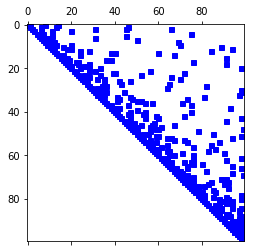

In [147]:
import numpy as np
import scipy.sparse as sparse
import matplotlib.pyplot as plt

def read_graph(in_file):
    """ Read in the graph from the data file.  The graph file is read
    into a sparse matrix in DOK format, see
    https://www.scipy-lectures.org/advanced/scipy_sparse/dok_matrix.html
    and then converted to CSR row format
    """
    def nodenumber(s):
        return int(s.lstrip('node'))
    graph = sparse.dok_matrix((1,1), dtype=np.float64)
    infile = open(in_file)
    for line in infile:
        elements = line.strip().split(',')
        n0 = nodenumber(elements.pop(0))
        for element in elements:
            if len(element)>0:
                destination, cost = element.split()
                n1=nodenumber(destination)
                if graph.shape[0]<=max(n0,n1):
                    graph.resize(max(n0,n1)+1,max(n0,n1)+1)
                graph[n0,n1]=float(cost)
    infile.close()
    return graph.tocsr()

def bellman(J, graph):
    "The Bellman operator."
    next_J = np.zeros(J.size)
    path = np.zeros(graph.shape[0],dtype=np.int64)
    # go through all vertices except the final (last)
    for i in range(graph.shape[0]-1):
        cost = graph.getrow(i).data
        indx = graph.getrow(i).indices
        if len(indx)>0:
            val = cost + J[indx]
            j = np.argmin(val)
            path[i] = indx[j]
            next_J[i]=val[j]
    return path, next_J

graph = read_graph('graph.txt')
J = np.zeros(graph.shape[0],dtype=np.float64)
plt.spy(graph+np.eye(graph.shape[0]),markersize=5)

# Main DP loop
iter=0
print('Backward induction steps')
while True:
    path, next_J = bellman(J, graph)
    tol=np.max(np.abs(next_J-J))
#     print(iter,J)
#     print(iter,next_J,tol)
    print(iter,tol)
    if tol<1e-8:
        break
    else:
        J = next_J
    iter+=1

# Print shortest path
print('\nShortest path: ',end='')
i=0
while True:
    print(i,end='')
    i=path[i]
    if i==0:
        break
    else: 
        print(' >> ',end='')
print('\nCost: ',J[0])

In [148]:
%%file graph.txt
node0, node1 2, node2 5
node1, node0 2, node2 -1.5, node3 4
node2, node0 5, node1 -1.5, node3 2
node3, node1 4, node2 2

Overwriting graph.txt


## Infinite horizon

- Shortest path is inherintly finite (Right?)
- For truely infinite problems things are a little different
- How can we be sure that the algorithm would terminate?


### Value of annuity

$$
\stackrel{\nearrow}{V} \quad
\stackrel{\searrow}{c} \quad
\stackrel{\searrow}{c} \quad
\stackrel{\searrow}{c} \quad
\dots
$$

- interest rate $r$
- What is the value of the annuity $V$?


### Value of annuity

$$
\stackrel{\nearrow}{V} \quad
\stackrel{\searrow}{c} \quad
\stackrel{\searrow}{c} \quad
\stackrel{\searrow}{c} \quad
\dots
$$

$$
V=\quad
\frac{c}{(1+r)^0} + \quad
\frac{c}{(1+r)^1} + \quad
\frac{c}{(1+r)^2} + \quad
\frac{c}{(1+r)^3} + \quad
\dots
$$

$$
\beta = \frac{1}{1+r}
$$

$$
V=\quad
c + \quad
c \beta + \quad
c \beta^2 + \quad
c \beta^3 + \quad
\dots
=
\sum_{t=0}^{\infty} \beta^t c
$$




### Geometric series

Assuming $\beta<1$

$$
V = \sum_{t=0}^{\infty} \beta^t c = \frac{c}{1-\beta}
$$

Can reformulate as **recursive equation**

$$
V = c + \beta ( c + \beta c + \beta^2 c + \dots ) = c + \beta V
$$

### Backward induction

1. Start with a guess $V_0$
2. Insert into the Bellman equation

$$
V_{i+1} = c + \beta V_i
$$

3. Repeat until convergence

$$
||V_{i}-V_{i-1}||\leq\varepsilon\text{ (small number)}
$$


### Will this algorithm converge?


$$
||V_{i}-V_{i-1}|| = ||(c+\beta V_{i-1})-(c+\beta V_{i-2})||=\beta ||V_{i-1}-V_{i-2}||
$$

- If $\beta<1$ with every iteration the difference $||V_{i}-V_{i-1}||$ becomes **strictly smaller**
- Recursive formula (Bellman equation) is **contraction mapping**
- Banach fixed point theorem guarantees unique solution!

In [149]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Setup
c=1            # Annual payment
beta=.9        # Discount factor
maxiter=1000   # Maximum number of iterations
epsilon=1e-4   # Small number

def T(V):
    return c+beta*V

analytic=c/(1-beta)
print('Analytic solution = ', analytic)

V0=0
for i in range(maxiter):
    V1=T(V0)
    if abs(V1-V0)<epsilon:
        break
    V0=V1

print('Numerical solution = ', V1)

if i+1>=maxiter:
    print('No convergence: maximum number of iterations achieved!')
    

Analytic solution =  10.000000000000002
Numerical solution =  9.999153585021714


### Convergence behavior

Exercise: change the value of $\beta$, $V_0$

In [150]:
beta=.975
V0=0
diff0=0
print('{:<4} {:>15} {:>15} {:>15} {:>10}'.format('Iter','Value','Error','Delta','D-ratio'))
for i in range(maxiter):
    V1=T(V0)
    diff1=V1-V0
    if diff0==0:
        print('{:<4d} {:>15.8f} {:>15.8f} {:>15.8f}'.format(i,V1,V1-(c/(1-beta)),diff1))
    else:
        print('{:<4d} {:>15.8f} {:>15.8f} {:>15.8f} {:>10.5f}'.format(i,V1,V1-(c/(1-beta)),diff1,diff1/diff0))
    if abs(V1-V0)<epsilon:
        break
    V0=V1
    diff0=diff1
if i+1<maxiter:
    print('Convergence achieved!')
else:
    print('No convergence: maximum number of iterations achieved!')


Iter           Value           Error           Delta    D-ratio
0         1.00000000    -39.00000000      1.00000000
1         1.97500000    -38.02500000      0.97500000    0.97500
2         2.92562500    -37.07437500      0.95062500    0.97500
3         3.85248437    -36.14751562      0.92685937    0.97500
4         4.75617227    -35.24382773      0.90368789    0.97500
5         5.63726796    -34.36273204      0.88109569    0.97500
6         6.49633626    -33.50366374      0.85906830    0.97500
7         7.33392785    -32.66607215      0.83759159    0.97500
8         8.15057966    -31.84942034      0.81665180    0.97500
9         8.94681517    -31.05318483      0.79623551    0.97500
10        9.72314479    -30.27685521      0.77632962    0.97500
11       10.48006617    -29.51993383      0.75692138    0.97500
12       11.21806451    -28.78193549      0.73799835    0.97500
13       11.93761290    -28.06238710      0.71954839    0.97500
14       12.63917258    -27.36082742      0.7015596

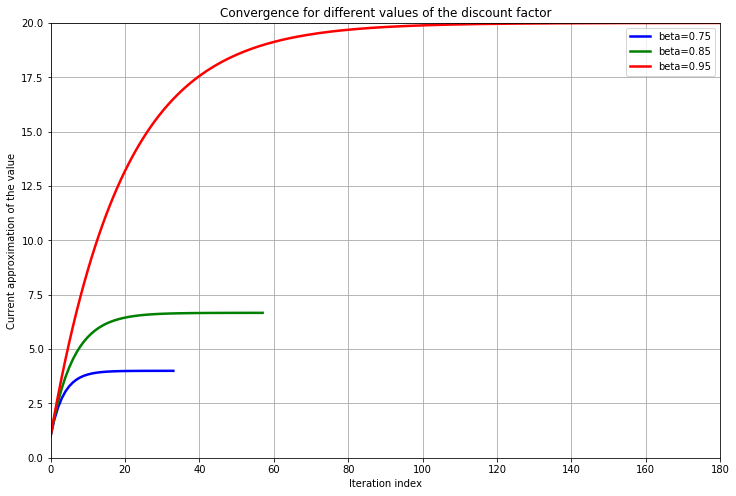

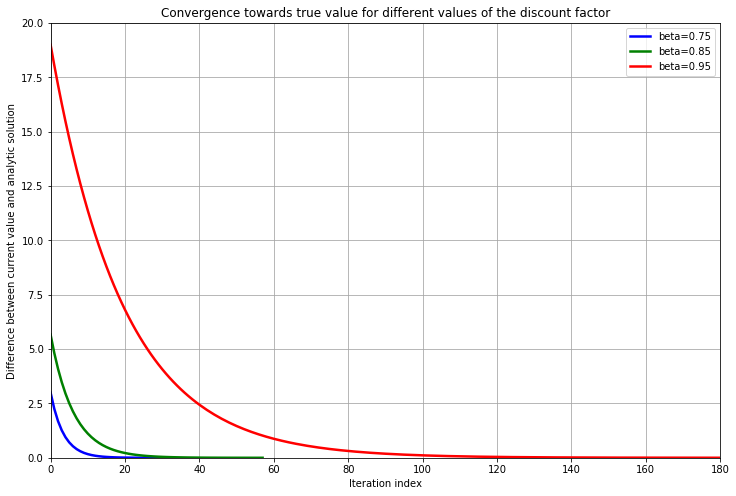

In [151]:
# matplotlib settings
plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['patch.force_edgecolor'] = True
from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

maxiter=500
fig1, ax1 = plt.subplots(figsize=(12,8))
plt.grid(b=True, which='both', color='0.65', linestyle='-')
ax1.set_title('Convergence for different values of the discount factor')
ax1.set_xlabel('Iteration index')
ax1.set_ylabel('Current approximation of the value')
fig2, ax2 = plt.subplots(figsize=(12,8))
plt.grid(b=True, which='both', color='0.65', linestyle='-')
ax2.set_title('Convergence towards true value for different values of the discount factor')
ax2.set_xlabel('Iteration index')
ax2.set_ylabel('Difference between current value and analytic solution')

for beta in (0.75,0.85,0.95):
    V0=0
    #solve for every beta
    analytic=c/(1-beta)
    data1=[]
    data2=[]
    for i in range(maxiter):
        V1=T(V0)
        data1.append(V1)
        data2.append(analytic-V1)
        if abs(V1-V0)<epsilon:
            break
        V0=V1
    ax1.plot(range(i+1),data1,label='beta={:.2f}'.format(beta),linewidth=2.5)
    ax2.plot(range(i+1),data2,label='beta={:.2f}'.format(beta),linewidth=2.5)
plt.figure(1)
plt.legend(loc=1)
plt.savefig('annuity1.eps', format='eps', dpi=300)
plt.figure(2)
plt.legend(loc=1)
plt.savefig('annuity2.eps', format='eps', dpi=300)
plt.show()

### Can we use Newton method?

Solving Bellman equation (disregard it is elementary in this example)

$$
F(V)=V - T(V) =0, \text{ where } T(V) = c + \beta V
$$

Newton step:

$$
V_{i+1} = V_i - \frac{F(V_i)}{F'(V_i)} = V_i - \frac{V_i-T(V_i)}{1-T'(V_i)}
$$

$$
V_{i+1} = V_i - \frac{V_i(1-\beta)-c}{1-\beta} = \frac{c}{1-\beta}
$$

Solution is achieved in **a single step**



### Cake eating problem

![cake](img/cake.png)

<img src="img/cake.png" width=100px>
- Cake of initial size $W_0$
- **How much of the cake to eat each period $t$?**
- Time is discrete, $t=1,2,\dots$
- What is not eaten in period $t$ is left for the future

$$W_{t+1}=W_t-c_t$$

<img src="img/cake.png" width=100px>
- Utility flow from cake consumption

$$
u(c_{t})=\log(c_t)
$$

- Future is discounted with discount factor $\beta$
- Optimization problem: 

$$
\max_{\{c_{t}\}_{0}^{\infty}}\sum_{t=0}^{\infty}\beta^{t}u(c_{t})
\longrightarrow \max
$$

<img src="img/cake.png" width=100px>
**Value function $V(W_t)$** = the maximum attainable value given the size of cake $W_t$ (in period $t$)

$$
\begin{eqnarray*}
  V(W_{0}) & = & \max_{\{c_{t}\}_{0}^{\infty}}\sum_{t=0}^{\infty}\beta^{t}u(c_{t})\\
  & = & \max_{c_{0}}\{u(c_{0})+\beta\max_{\{c_{t}\}_{1}^{\infty}}\sum_{t=1}^{\infty}\beta^{t-1}u(c_{t})\}\\
  & = & \max_{c_{0}}\{u(c_{0})+\beta V(W_{1})\}
\end{eqnarray*}
$$

<img src="img/cake.png" width=100px>
**Bellman equation**

$$
V(W_{t})=\max_{0 \le c_{t} \le W_t}\big\{u(c_{t})+\beta V(\underset{=W_{t}-c_{t}}{\underbrace{W_{t+1}}})\big\}
$$

- **State variables**  — vector of variables that describe all relevant information about the modeled decision process, $W_t$
- **Decision variables** — vector of variables describing the choices, $c_t$
- **Instantaneous payoff** — utility function, $u(c_t)$, with time separable discounted utility
- **Motion rules** — agent's beliefs of how state variable evolve through time, conditional on choices, $W_{t+1}=W_t-c_t$
- **Value function** — maximum attainable utility, $V(W_t)$
- **Policy function** — mapping from state space to action space that returns the optimal choice, $c^{\star}(W_t)$

### Cake eating: analytic solution
- Start with a (good) guess of $V(W)=A+B\log W$
$$
\begin{eqnarray*}
  V(W) & = & \max_{c}\big\{u(c)+\beta V(W-c)\big\} \\
  A+B\log W & = & \max_{c} \big\{\log c+\beta(A+B\log (W-c)) \big\}
\end{eqnarray*}
$$
- Determine $A$ and $B$ and find the optimal rule for cake consumption.
- This is only possible in **few** models!

$$
c^{\star}(W) = \arg\max_{c}\big\{\log(c)+\beta V(W-c)\big\} = (1-\beta)W
$$


### Cake eating: numeric solution
- Value of annuity: 
$$
{V} = c + \beta {V}
$$

- Cake eating: 
$$
{V(}W{)} = \max_{0 \le c \le W} \big\{u(c)+\beta {V(}W-c{)} \big \}
$$

- Have to solve the {functional equation} for $V(W)$
\medskip
- The Bellman operator in functional space
$$
T({V})(W) \equiv \max_{0 \le c \le W}\{u(c)+\beta {V}(W-c)\}
$$


- The Bellman equations is then $V(W) = T({V})(W)$, with the solution given by the fixed point


### Can we find the fixed point by iterations?
- Need contraction property for $T(V)(W)$
- Blackwell sufficient conditions for contraction
  1. Monotonicity: satisfied due to maximization in $T(V)(W)$
  2. Discounting: satisfied by elementary argument when $\beta<1$
- The Bellman operator is a **contraction mapping**!

### Contraction mapping theorem (Banach Fixed Point Theorem)
Let $(S,\rho)$ be a complete metric space with a contraction mapping $T: S \rightarrow S$.
Then 
1. $T$ admits a unique fixed-point $V^{\star} \in S$, i.e. $T(V^{\star}) = V^{\star}$. 
2. $V^{\star}$ can be found by repeated application of the operator $T$, i.e. $T^n(V) \rightarrow V^{\star}$ as $n\rightarrow \infty$.


### Value function iterations (VFI)
1. Start with an arbitrary guess $V_0(W)$
2. At each iteration $i$ compute 

$$
\begin{eqnarray*}
V_i(W) = T(V_{i-1})(W) &=& 
\max_{0 \le c \le W} \big\{u(c)+\beta V_{i-1}(W-c) \big \}  \\
c_{i-1}(W) &=& 
\underset{0 \le c \le W}{\arg\max} \big\{u(c)+\beta V_{i-1}(W-c) \big \} 
\end{eqnarray*}
$$

3. Repeat until convergence 

$$
||V_{i}(W)-V_{i-1}(W)||\leq\varepsilon\text{ (small number,} ||\cdot|| \text{ sup norm)}
$$


### The contraction mapping theorem implies

- Unique fixed point $\Leftrightarrow$ unique solution to the Bellman equation
- The fixed point can be reached by an iterative process using an **arbitrary
initial guess**!
- Therefore VFI algorithm converges globally


### Numerical implementation of the Bellman operator
- Cake is continuous $\rightarrow$ value function is a function of continuous variable
- Solution: **discretize $W$**  
Construct a _grid_ (vector) of cake-sizes  $\vec{W}\in\{0,\dots\overline{W}\}$

$$V_{i}(\vec{W})=\max_{0 \le c \le \vec{W}}\{u(c)+\beta V_{i-1}(\vec{W}-c)\}$$

- Compute value and policy function sequentially point-by-point
- May need to compute the value function _between grid points_
$\Rightarrow$
Interpolation and function approximation

### Can interpolation be avoided?
- Note that conditional on $W_t$, the choice of $c$ defines $W_{t+1}$ 
- Can replace $c$ with $W_{t+1}$ in Bellman equation so that _next period cake size is the decision variable_
- "Dual" formulation of the same problem 

$$
V_{i}(\vec{W})=\max_{0 \le \vec{W}' \le \vec{W}}\{u(\vec{W}-\vec{W}')+\beta V_{i-1}(\vec{W}')\}
$$

- Compute value and policy function sequentially point-by-point
- Note that grid $\vec{W}\in\{0,\dots\overline{W}\}$ is used twice: for state space and for decision space
- _Can you spot the potential problem?_

In [152]:
# Setup
beta=.9        # Discount factor
Wbar=10        # Upper bound on cake size
ngrid=50       # Number of grid points
maxiter=1000   # Maximum number of iterations
epsilon=1e-4   # Small number

machine_epsilon=np.finfo(float).eps #smallest positive float number
grid=np.linspace(machine_epsilon,Wbar,ngrid).reshape(1,ngrid) #grid for both state and decision space

def Bellman(V0):
    #Bellman operator, V0 is vector-row of values on grid
    matW=np.repeat(grid,ngrid,0) #matrix with state space repeated in rows
    matWpr=np.repeat(np.transpose(grid),ngrid,1) #matrix with decision space repeated in columns
    matV0=np.repeat(np.transpose(V0),ngrid,1) #current value function repeated in columns
    c=matW-matWpr #level of cake consumtpion in current period
    c[c==0]=machine_epsilon #add small quantity to avoid log(0)
    mask=c>0 #mask off infeasible choices
    preV=-np.inf*np.ones((ngrid,ngrid)) #prepare space for trial values for all possible choices
    preV[mask]=np.log(c[mask])+beta*matV0[mask] #maximand of the Bellman equation
    V1=np.amax(preV,0,keepdims=True) #maximum in every column
    return V1

V0=np.log(grid)
for i in range(maxiter):
    V1=Bellman(V0)
    if np.max(abs(V1-V0))<epsilon:
        break
    V0=V1

print('Numerical solution:\nV(W)= ', V1)
print('W = ', grid)

if i+1<maxiter:
    print('Convergence achieved!')
else:
    print('No convergence: maximum number of iterations achieved!')
    

Numerical solution:
V(W)=  [[-360.43568538 -325.9812672  -294.97229083 -267.0642121  -241.94694125
  -219.34139747 -198.99640808 -180.68591763 -164.20647622 -149.37497895
  -136.02663141 -124.01311862 -113.20095711 -103.47001176  -94.71216094
   -86.8300952   -79.73623603  -73.35176278  -67.60573686  -62.43431353
   -57.78003253  -53.59117963  -49.82121202  -46.42824117  -43.37456741
   -40.62626102  -38.15278527  -35.9266571   -33.92314174  -32.11997792
   -30.49713049  -29.03656779  -27.72206137  -26.53900558  -25.47425538
   -24.5159802   -23.65353253  -22.87732963  -22.17874702  -21.48559984
   -20.85687549  -20.23304303  -19.66719112  -19.1057419   -18.59647518
   -18.09117088  -17.63283083  -17.17805697  -16.76555092  -16.35625445]]
W =  [[2.22044605e-16 2.04081633e-01 4.08163265e-01 6.12244898e-01
  8.16326531e-01 1.02040816e+00 1.22448980e+00 1.42857143e+00
  1.63265306e+00 1.83673469e+00 2.04081633e+00 2.24489796e+00
  2.44897959e+00 2.65306122e+00 2.85714286e+00 3.06122449e+0

#### Convergence behavior

Exercise: change the value of $\beta$, $V_0$, $ngrid$

In [153]:
beta=.9
# V0=np.log(grid)
V0=np.zeros((1,ngrid))

print('{:<4} {:>15} {:>10}'.format('Iter','Delta','D-ratio'))
diff0=0
for i in range(maxiter):
    V1=Bellman(V0)
    diff1=np.max(abs(V1-V0))
    if diff0==0:
        print('{:<4d} {:>15.10f}'.format(i,diff1))
    else:
        print('{:<4d} {:>15.10f} {:>10.5f}'.format(i,diff1,diff1/diff0))
    if np.max(abs(V1-V0))<epsilon:
        break
    V0=V1
    diff0=diff1
if i+1<maxiter:
    print('Convergence achieved!')
else:
    print('No convergence: maximum number of iterations achieved!')


Iter           Delta    D-ratio
0      36.0436533891
1      32.4392880502    0.90000
2      29.1953592452    0.90000
3      26.2758233207    0.90000
4      23.6482409886    0.90000
5      21.2834168897    0.90000
6      19.1550752008    0.90000
7      17.2395676807    0.90000
8      15.5156109126    0.90000
9      13.9640498214    0.90000
10     12.5676448392    0.90000
11     11.3108803553    0.90000
12     10.1797923198    0.90000
13      9.1618130878    0.90000
14      8.2456317790    0.90000
15      7.4210686011    0.90000
16      6.6789617410    0.90000
17      6.0110655669    0.90000
18      5.4099590102    0.90000
19      4.8689631092    0.90000
20      4.3820667983    0.90000
21      3.9438601184    0.90000
22      3.5494741066    0.90000
23      3.1945266959    0.90000
24      2.8750740263    0.90000
25      2.5875666237    0.90000
26      2.3288099613    0.90000
27      2.0959289652    0.90000
28      1.8863360687    0.90000
29      1.6977024618    0.90000
30      1.527932215

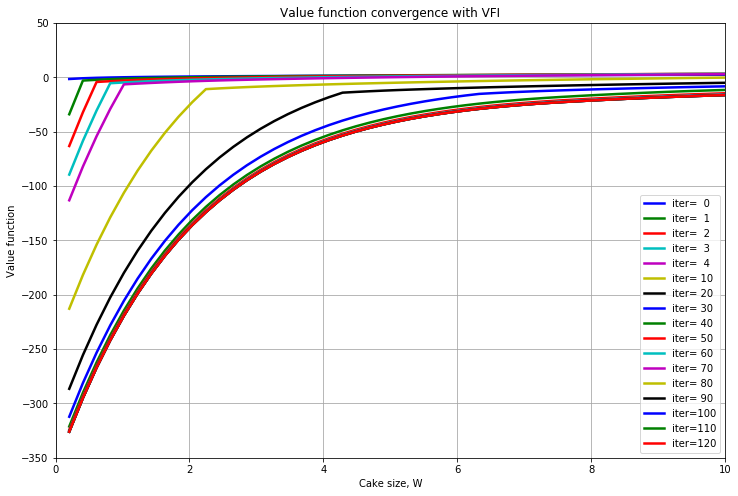

In [154]:
plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['patch.force_edgecolor'] = True
from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

fig1, ax1 = plt.subplots(figsize=(12,8))
plt.grid(b=True, which='both', color='0.65', linestyle='-')
ax1.set_title('Value function convergence with VFI')
ax1.set_xlabel('Cake size, W')
ax1.set_ylabel('Value function')

beta=.9
maxiter=500
V0=np.log(grid)
V0=np.zeros((1,ngrid))
for i in range(maxiter):
    V1=Bellman(V0)
    if i<5 or i%10==0:
        ax1.plot(np.squeeze(grid[0][1:]),np.squeeze(V1[0][1:]),label='iter={:3d}'.format(i),linewidth=2.5)
    diff1=np.max(V1-V0)
    if np.max(abs(V1-V0))<epsilon:
        break
    V0=V1

plt.legend(loc=4)
plt.savefig('cake1value.eps', format='eps', dpi=300)
plt.show()



### How to measure numerical errors?
- In our case there is an analytic solution

$$
c^{\star}(W) = (1-\beta)W
$$

$$
V(W) = \log((1-\beta)W) + \beta V(\beta W)
$$

- Typically very dense (slow) grid is used in place of true solution
- Can control for max or mean error at the grid points of value and policy functions

## Cake eating with discretized choices

_Control for grid over state space separately from the discretization of the choice variables to increase accuracy_

- As before solve cake eating Bellman equation by VFI

$$V(W) = \max_{0 \le c \le W} \big\{u(c)+\beta V(W-c) \big \}$$

- Discretize state space with $\vec{W}\in\{0,\dots\overline{W}\}$

- Discretize decision space with $\vec{D}\in\{0,\dots\overline{D}\}$, usually $\overline{D}=\overline{W}$

$$V_{i}(\vec{W})=\max_{0 \le \vec{D} \le \vec{W}}\{u(c)+\beta V_{i-1}(\vec{W}-c)\}$$

- Compute value/policy function point-by-point on grid $\vec{W}$
- Find the maximum over the points of grid $\vec{D}$ that satisfy the choice set condition $0 \le \vec{D} \le W$

### Value function interpolation
- In each iteration, the value function $V_{i}(\vec{W})$ is computed on a set of grid points
- But for iteration $i+1$ we need to compute $V_{i}(\vec{W}-c)\}=V_{i}(\vec{W}-\vec{D})\}$
- **Interpolation of the value function**

In [155]:
# Setup
beta=.9           # Discount factor
Wbar=10           # Upper bound on cake size
ngrid_state=50     # Number of grid points for the state space
ngrid_decision=100 # Number of grid points for the state space
maxiter=1000      # Maximum number of iterations
epsilon=1e-4      # Small number

machine_epsilon=np.finfo(float).eps #smallest positive float number
grid_state=np.linspace(machine_epsilon,Wbar,ngrid_state).reshape(1,ngrid_state) #grid for state space
grid_decision=np.linspace(machine_epsilon,Wbar,ngrid_decision).reshape(ngrid_decision,1) #grid for decision space

def Bellman(V0):
    #Bellman operator, V0 is vector-row of values on grid
    matW=np.repeat(grid_state,ngrid_decision,0) #matrix with state space repeated in rows
    c=np.repeat(grid_decision,ngrid_state,1) #decisions grid repeated by columns
    matWpr=matW-c #size of cake in the next period
    matWpr[matWpr==0]=machine_epsilon #add small quantity to avoid log(0)
    mask=matWpr>0 #mask off infeasible choices
    matV=np.interp(matWpr,np.squeeze(grid_state),np.squeeze(V0)) #values of next period value at next period case sizes
    preV=-np.inf*np.ones((ngrid_decision,ngrid_state)) #prepare space for trial values for all possible choices
    preV[mask]=np.log(c[mask])+beta*matV[mask] #maximand of the Bellman equation
    V1=np.amax(preV,0,keepdims=True) #maximum in every column
    return V1

V0=np.log(grid_state)
for i in range(maxiter):
    V1=Bellman(V0)
    if np.max(abs(V1-V0))<epsilon:
        break
    V0=V1

print('Numerical solution:\nV(W)= ', V1)
print('W = ', grid_state)

if i+1<maxiter:
    print('Convergence achieved!')
else:
    print('No convergence: maximum number of iterations achieved!')
    

Numerical solution:
V(W)=  [[-360.43568538 -298.55863455 -248.02570971 -206.75715443 -173.05450094
  -145.53066727 -123.05286976 -104.6960018   -89.70455963  -77.46154853
   -67.46308946  -59.29768122  -52.62926449  -47.18339083  -42.73592734
   -39.10383215  -36.13762109  -33.71521538  -31.73691739  -30.12130736
   -28.69551763  -27.41361493  -26.26107856  -25.2248532   -24.29320104
   -23.45556882  -22.6693618   -21.93933539  -21.25779645  -20.62325323
   -20.0266352   -19.45623585  -18.91975632  -18.40701364  -17.92461364
   -17.46369691  -17.02128063  -16.59727636  -16.19119697  -15.80172618
   -15.42716427  -15.06214578  -14.71202868  -14.37518323  -14.04707299
   -13.73232955  -13.4250673   -13.12611519  -12.83725634  -12.55759182]]
W =  [[2.22044605e-16 2.04081633e-01 4.08163265e-01 6.12244898e-01
  8.16326531e-01 1.02040816e+00 1.22448980e+00 1.42857143e+00
  1.63265306e+00 1.83673469e+00 2.04081633e+00 2.24489796e+00
  2.44897959e+00 2.65306122e+00 2.85714286e+00 3.06122449e+0

In [156]:
beta=.9
# V0=np.log(grid_state)
V0=np.zeros((1,ngrid_state))

print('{:<4} {:>15} {:>10}'.format('Iter','Delta','D-ratio'))
diff0=0
for i in range(maxiter):
    V1=Bellman(V0)
    diff1=np.max(abs(V1-V0))
    if diff0==0:
        print('{:<4d} {:>15.10f}'.format(i,diff1))
    else:
        print('{:<4d} {:>15.10f} {:>10.5f}'.format(i,diff1,diff1/diff0))
    if np.max(abs(V1-V0))<epsilon:
        break
    V0=V1
    diff0=diff1
if i+1<maxiter:
    print('Convergence achieved!')
else:
    print('No convergence: maximum number of iterations achieved!')


Iter           Delta    D-ratio
0      36.0436533891
1      32.4392880502    0.90000
2      29.1953592452    0.90000
3      26.2758233207    0.90000
4      23.6482409886    0.90000
5      21.2834168897    0.90000
6      19.1550752008    0.90000
7      17.2395676807    0.90000
8      15.5156109126    0.90000
9      13.9640498214    0.90000
10     12.5676448392    0.90000
11     11.3108803553    0.90000
12     10.1797923198    0.90000
13      9.1618130878    0.90000
14      8.2456317790    0.90000
15      7.4210686011    0.90000
16      6.6789617410    0.90000
17      6.0110655669    0.90000
18      5.4099590102    0.90000
19      4.8689631092    0.90000
20      4.3820667983    0.90000
21      3.9438601184    0.90000
22      3.5494741066    0.90000
23      3.1945266959    0.90000
24      2.8750740263    0.90000
25      2.5875666237    0.90000
26      2.3288099613    0.90000
27      2.0959289652    0.90000
28      1.8863360687    0.90000
29      1.6977024618    0.90000
30      1.527932215

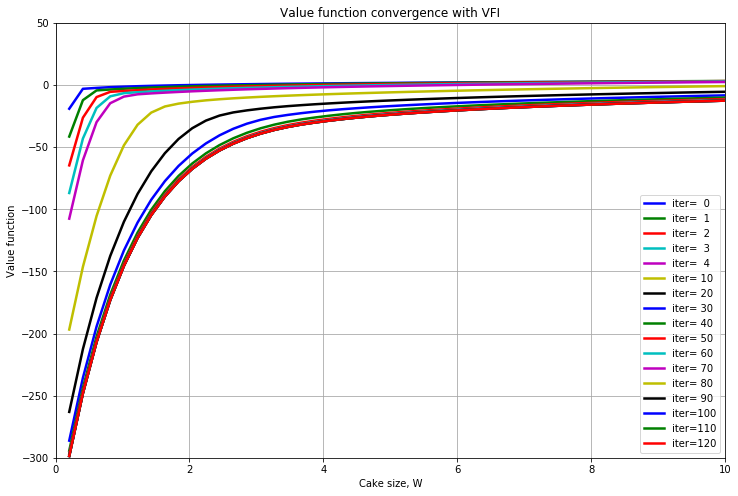

In [157]:
fig1, ax1 = plt.subplots(figsize=(12,8))
plt.grid(b=True, which='both', color='0.65', linestyle='-')
ax1.set_title('Value function convergence with VFI')
ax1.set_xlabel('Cake size, W')
ax1.set_ylabel('Value function')

beta=.9
maxiter=500
V0=np.log(grid_state)
for i in range(maxiter):
    V1=Bellman(V0)
    if i<5 or i%10==0:
        ax1.plot(np.squeeze(grid_state[0][1:]),np.squeeze(V1[0][1:]),label='iter={:3d}'.format(i),linewidth=2.5)
    diff1=np.max(V1-V0)
    if np.max(abs(V1-V0))<epsilon:
        break
    V0=V1
    
plt.legend(loc=4)
plt.savefig('cake2value.eps', format='eps', dpi=300)
plt.show()

## Further learning resources
* QuantEcon DP section https://lectures.quantecon.org/py/index_dynamic_programming.html
* Computerphile on Dijkstra algorithm https://www.youtube.com/watch?v=GazC3A4OQTE